In [1]:
from torchvision import models
from torchvision import transforms
from PIL import Image
import torch

from imagenet_classes import imagenet_class_dict

In [20]:
class Recog:
    def __init__(self):
        self.resnet = models.resnet101(pretrained=True)
        self.resnet.eval()
        self.preprocess =  transforms.Compose([
            transforms.Resize(256),
            transforms.CenterCrop(224),
            transforms.ToTensor(),
            transforms.Normalize(
                mean=[0.485, 0.456, 0.406],
                std=[0.229, 0.224, 0.225]
            )
        ])
    def whatis(self, img_file):
        img = Image.open(img_file).convert('RGB')
        img_t = self.preprocess(img)
        img_batch = torch.unsqueeze(img_t, 0)
        out = self.resnet(img_batch)
        _, ix = torch.max(out, 1)
        name = imagenet_class_dict[int(ix)]
        print(f"Pic in {img_file} is {name}")
        return img

recog = Recog()

In [1]:
recog.whatis('dog1.png')

NameError: name 'recog' is not defined

Pic in dog3.png is golden retriever


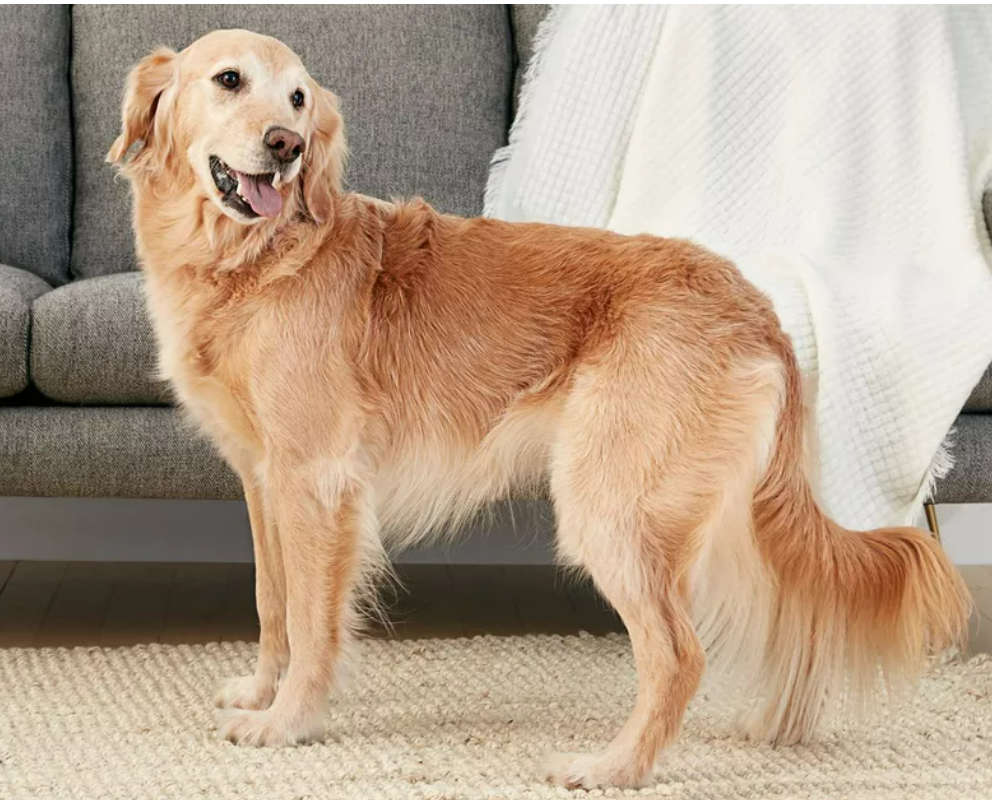

In [23]:
recog.whatis('dog3.png')